# Remoção de ruído de áudios utilizando Python e a FFT

O exemplo abaixo demonstra a adição de ruído a uma senóide e a aplicação da FFT e seus espectros para realizar a filtragem

## Parte 1 - processamento simples de senóides 

Nesta primeira etapa geramos uma senóide considerada "limpa" -linha 14 - e adicionamos um ruído Gaussiano (ruído branco) - linha 18. Após isso, aplicamos a FFT sobre o sinal e calculamos sua densidade espectral (PSD). Utilizando um threshold de 100, filtramos apenas frequencias maiores que este valor e zeramos qualquer outra para termos a senóide limpa novamente.

### 1. Gerar os sinais 

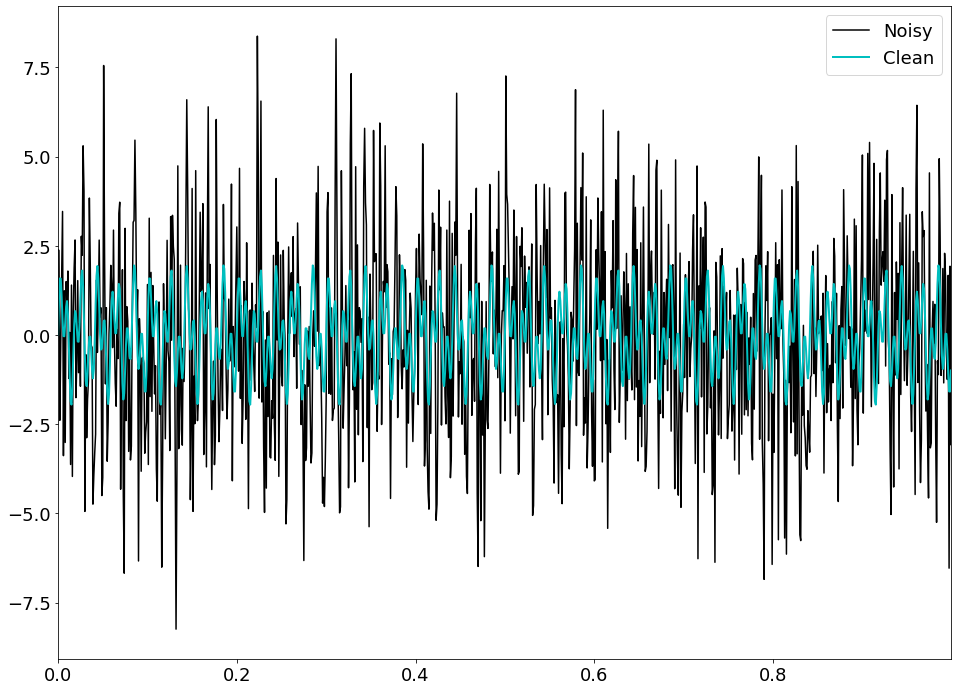

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import IPython

plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size': 18})

# criar um sinal simples com duas frequencias
#dt = 0.00001 # =>>>>>>>> ALTERAR PARA dt PARA ISSO AQUI SE QUISER ESCUTAR ALGUMA COISA DO OUTPUT ALI EMBAIXO
dt = 0.001 # dt eh o intervalo de samples
t = np.arange(0, 1, dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # os picos seram em 50 e 120
f_clean = f

# adiciona ruido
f = f + 2.5*np.random.randn(len(t)) # variar amplitude # ruído Gaussiano (ruído branco)

# plota os graficos so para visualizar
plt.plot(t, f, color='k', LineWidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='c', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()


### 2. Computar a FFT e pegar a densidade espectral


C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


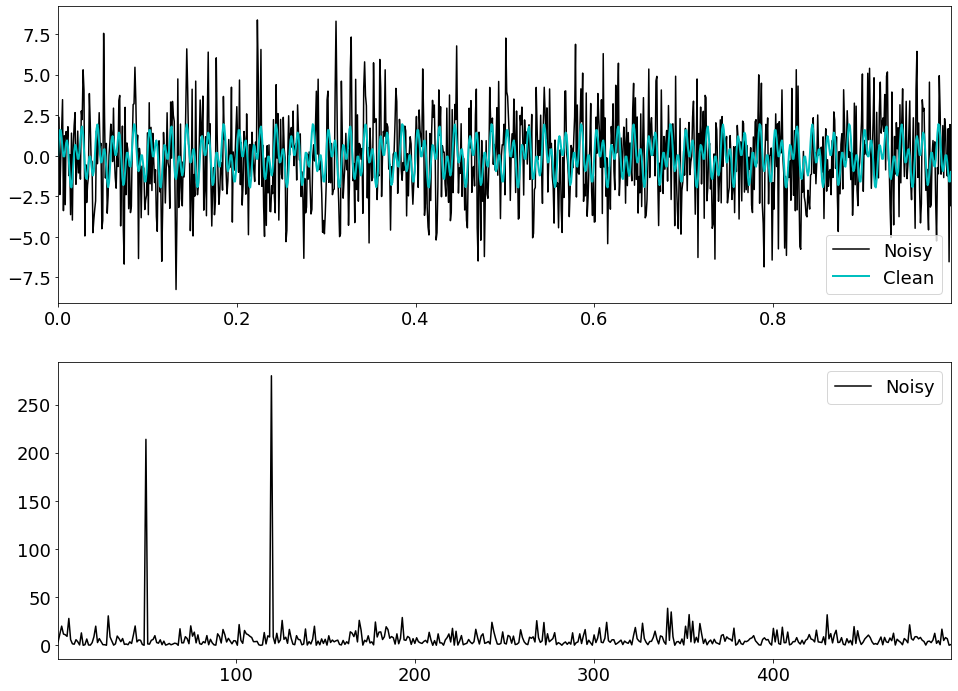

In [46]:
# computa a FFT
n = len(t)
# compute the fft in the noisy signal
fhat = np.fft.fft(f,n)
# power sepectrum 
PSD = fhat * np.conj(fhat) / n

# create x-axis of frequencies
freq = (1/(dt*n)) * np.arange(n)

# only plot the first half of
L = np.arange(1, np.floor(n/2), dtype = 'int')

fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t, f, color='k', LineWidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='c', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='k', LineWidth=1.5, label='Noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()

### 3. Filtra o ruído utilizando a potencia de espectro
Neste exemplos utilizamos um threshold de 100. Então basicamente mantemos valores maiores que 100 e zeramos os outros. A partir disso, faremos a FFT inversa para ter o sinal limpo novamente.

C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


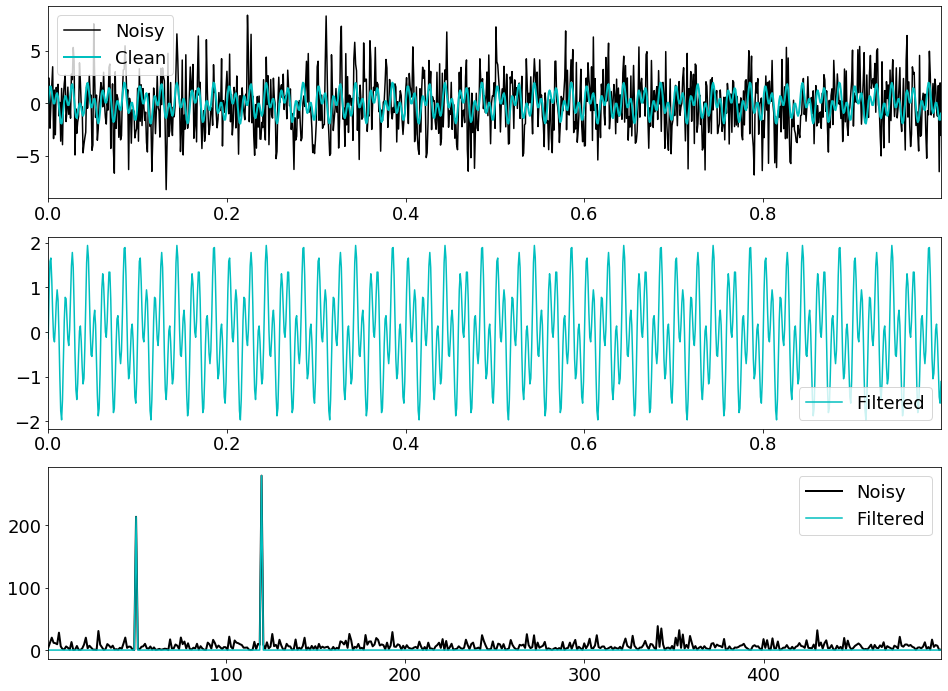

In [47]:
# Use PSD to filter out the noise
indices = PSD > 100 # acha todas as frequencias maior que esse threshold
PSDclean = PSD * indices # zera as outras
fhat = indices * fhat # zera os menores coeficientes de Fourier em Y
ffilt = np.fft.ifft(fhat) # faz a FFT inversa para pegar o sinal filtrado

fig, axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t, f, color='k', LineWidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='c', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t, ffilt, color='c', LineWidth=1.5, label='Filtered')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='k', LineWidth=2, label='Noisy')
plt.plot(freq[L], PSDclean[L], color='c', LineWidth=1.5, label='Filtered')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()

### Sinal f_clean 

In [44]:
IPython.display.Audio(data=f_clean, rate=n)

### Sinal f_clean com ruído

In [35]:
IPython.display.Audio(data=f, rate=n)

### Filtrado (resultado final)

In [36]:
IPython.display.Audio(data=ffilt, rate=n)

## Parte 2 - Mesma abordagem da parte 1, porém utilizando áudios caseiros, alterando valores e analisando os resultados


In [48]:
import IPython
import matplotlib.pyplot as plt
import scipy
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
from numpy.fft import *

plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size': 18})

# carrega os audios
clean_rate, clean = wavfile.read('teste.wav') # CLEAN
noise_rate, noise = wavfile.read('traffic12.wav') # TRAFFIC

# adiciona o ruido no audio clean
noisy = clean + noise

C:\Users\Breno.Silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: WavFileWarning: Chunk (non-data) not understood, skipping it.
  if sys.path[0] == '':


### Limpo

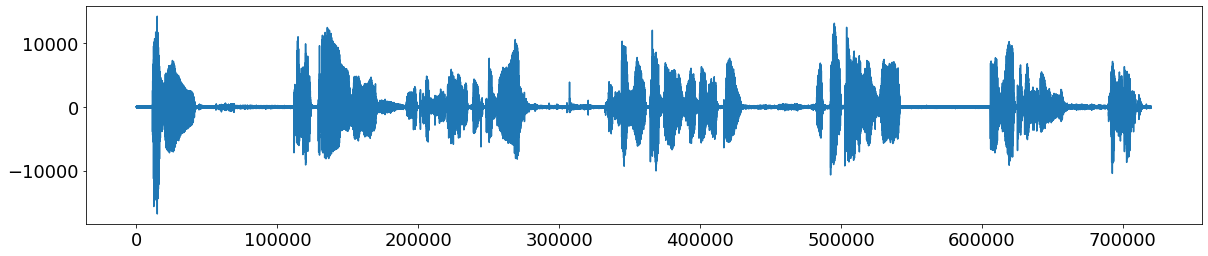

In [21]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(clean)

IPython.display.Audio(data=clean, rate=clean_rate)

### Ruído

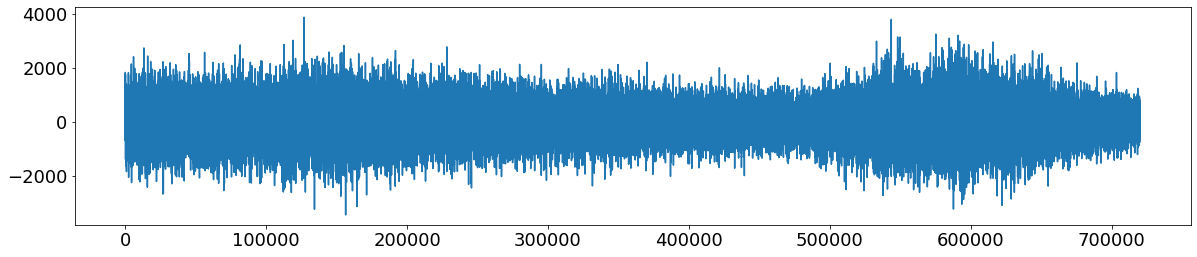

In [49]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(noise)

IPython.display.Audio(data=noise, rate=noise_rate)

### Limpo + Ruído

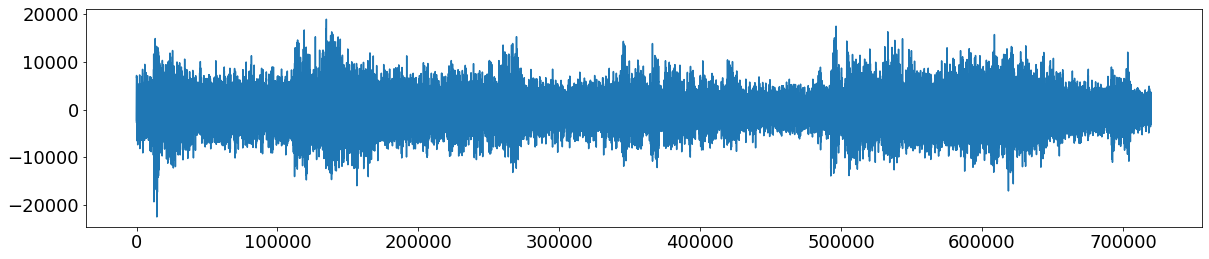

In [23]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(noisy)

IPython.display.Audio(data=noisy, rate=clean_rate)

### Calculando tempo, sampling rate e quantidade de samples

In [50]:
N = noisy.shape[0] #[0]
print ("Complete Samplings N", N)

# quantos segundos eh o audio
type(N)
secs = N / float(clean_rate)
print ("secs", secs)

# intervalo entre cada sample
Ts = 1.0/clean_rate
print ("Timestep between samples Ts", Ts)

# pega numpy array
t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray

Complete Samplings N 720000
secs 15.0
Timestep between samples Ts 2.0833333333333333e-05


C:\Users\Breno.Silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  


2.083e-05


C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


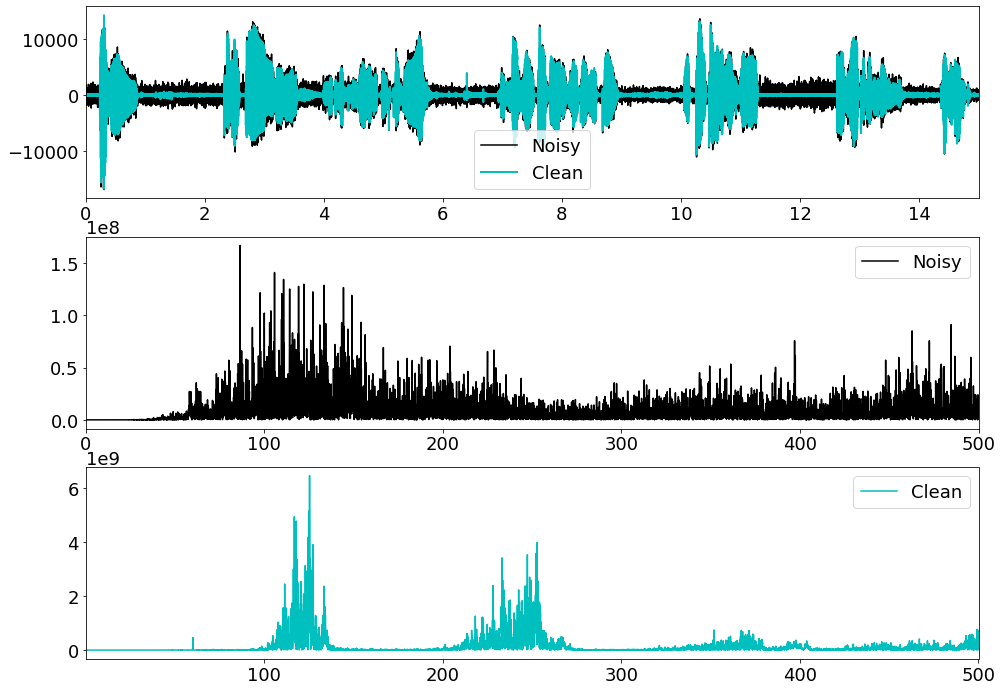

In [53]:
# :::::: computa a FFT do sinal completo (limpo + ruido) :::::::::::::::;
n = len(t)
# compute the fft in the noisy signal
fhat = np.fft.fft(noisy,n)
# power sepectrum 
PSD = fhat * np.conj(fhat) / n

#dt = 0.00002083

# create x-axis of frequencies
freq = (1/(dt*n)) * np.arange(n)
# only plot the first half of
L = np.arange(1, np.floor(n/2), dtype = 'int')

fig, axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t, noisy, color='k', LineWidth=1.5, label='Noisy')
plt.plot(t, clean, color='c', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='k', LineWidth=1.5, label='Noisy')
plt.xlim(0, 500)
plt.legend()


plt.sca(axs[2])
plt.plot(freq2[L2], PSD2[L2], color='c', LineWidth=1.5, label='Clean')
plt.xlim(freq2[L2[0]], 500)
plt.legend()

plt.show()

In [52]:
# usa PSD (power spectre) 
indices = PSD > 2.5 # >>>>>>>>>>>>>>>>>>>>>> BRINCAR COM ESSE VALOR 
PSDclean = PSD * indices # zera as outras
fhat = indices * fhat # zera os menores coeficientes de Fourier em Y
ffilt = np.fft.ifft(fhat) # faz a FFT inversa para pegar o sinal filtrado

<class 'numpy.ndarray'>


C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


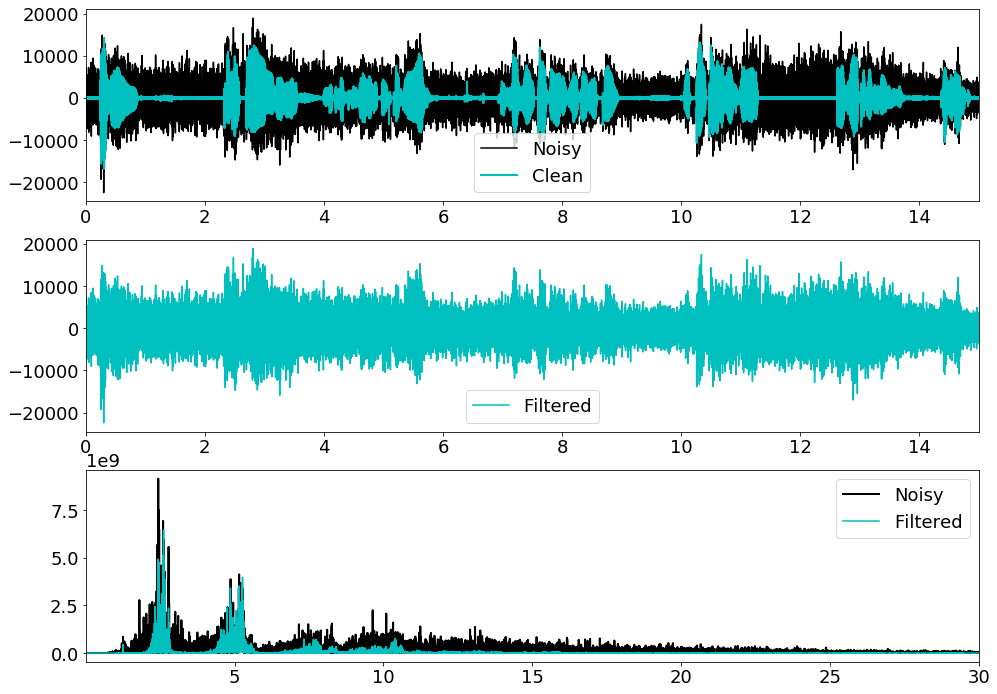

In [256]:
# # ::::::::::::::: PLOTS ::::::::::::::::::::::::::
fig, axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t, noisy, color='k', LineWidth=1.5, label='Noisy')
plt.plot(t, clean, color='c', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t, ffilt, color='c', LineWidth=1.5, label='Filtered')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='k', LineWidth=2, label='Noisy')
plt.plot(freq[L], PSDclean[L], color='c', LineWidth=1.5, label='Filtered')
plt.xlim(freq[L[0]], 30)
plt.legend()

plt.show()


In [270]:
IPython.display.Audio(data=ffilt, rate=rate)

C:\Users\Breno.Silva\Anaconda3\lib\site-packages\IPython\lib\display.py:158: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


## Parte 3 - Algoritmo proposto pelo professor

In [ ]:
# TODO